In [1]:
import pandas as pd

In [2]:
insurance = pd.read_csv('insurance.csv', sep=',')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
insurance_train, insurance_test = train_test_split(insurance, test_size=0.3,
                                                stratify=insurance['sex'],
                                                random_state=42)

print(insurance_train.shape, insurance_test.shape)

(936, 7) (402, 7)


In [7]:
from sklearn.tree import DecisionTreeRegressor

features = ['children']
dt_regression = DecisionTreeRegressor(max_depth=2) # increase max_depth to see effect in the plot
dt_regression.fit(insurance_train[features], insurance_train['age'])

DecisionTreeRegressor(max_depth=2)

In [8]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception('The amount of predictions did not equal the amount of actuals.')
        
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [9]:
predictionsOnTrainSet = dt_regression.predict(insurance_train[features])
predictionsOnTestSet = dt_regression.predict(insurance_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainSet, insurance_train['age'])
rmseTest = calculate_rmse(predictionsOnTestSet, insurance_test['age'])

print('RMSE on training set ' + str(rmseTrain))
print('RMSE on test set ' + str(rmseTest))

RMSE on training set 13.781274642599135
RMSE on test set 14.555593357456134


In [10]:

from sklearn import tree

def plot_tree_regression(model, features):
    # generate plot data
    graph = tree.plot_tree(model,
                          feature_names=features,
                          filled=True)
    
    # display in the notebook
    return graph

[Text(1339.1999999999998, 1812.0, 'children <= 4.5\nmse = 190.593\nsamples = 936\nvalue = 39.178'),
 Text(892.8, 1087.2, 'children <= 2.5\nmse = 191.958\nsamples = 922\nvalue = 39.247'),
 Text(446.4, 362.39999999999986, 'mse = 198.172\nsamples = 797\nvalue = 39.009'),
 Text(1339.1999999999998, 362.39999999999986, 'mse = 149.666\nsamples = 125\nvalue = 40.768'),
 Text(1785.6, 1087.2, 'mse = 79.801\nsamples = 14\nvalue = 34.643')]

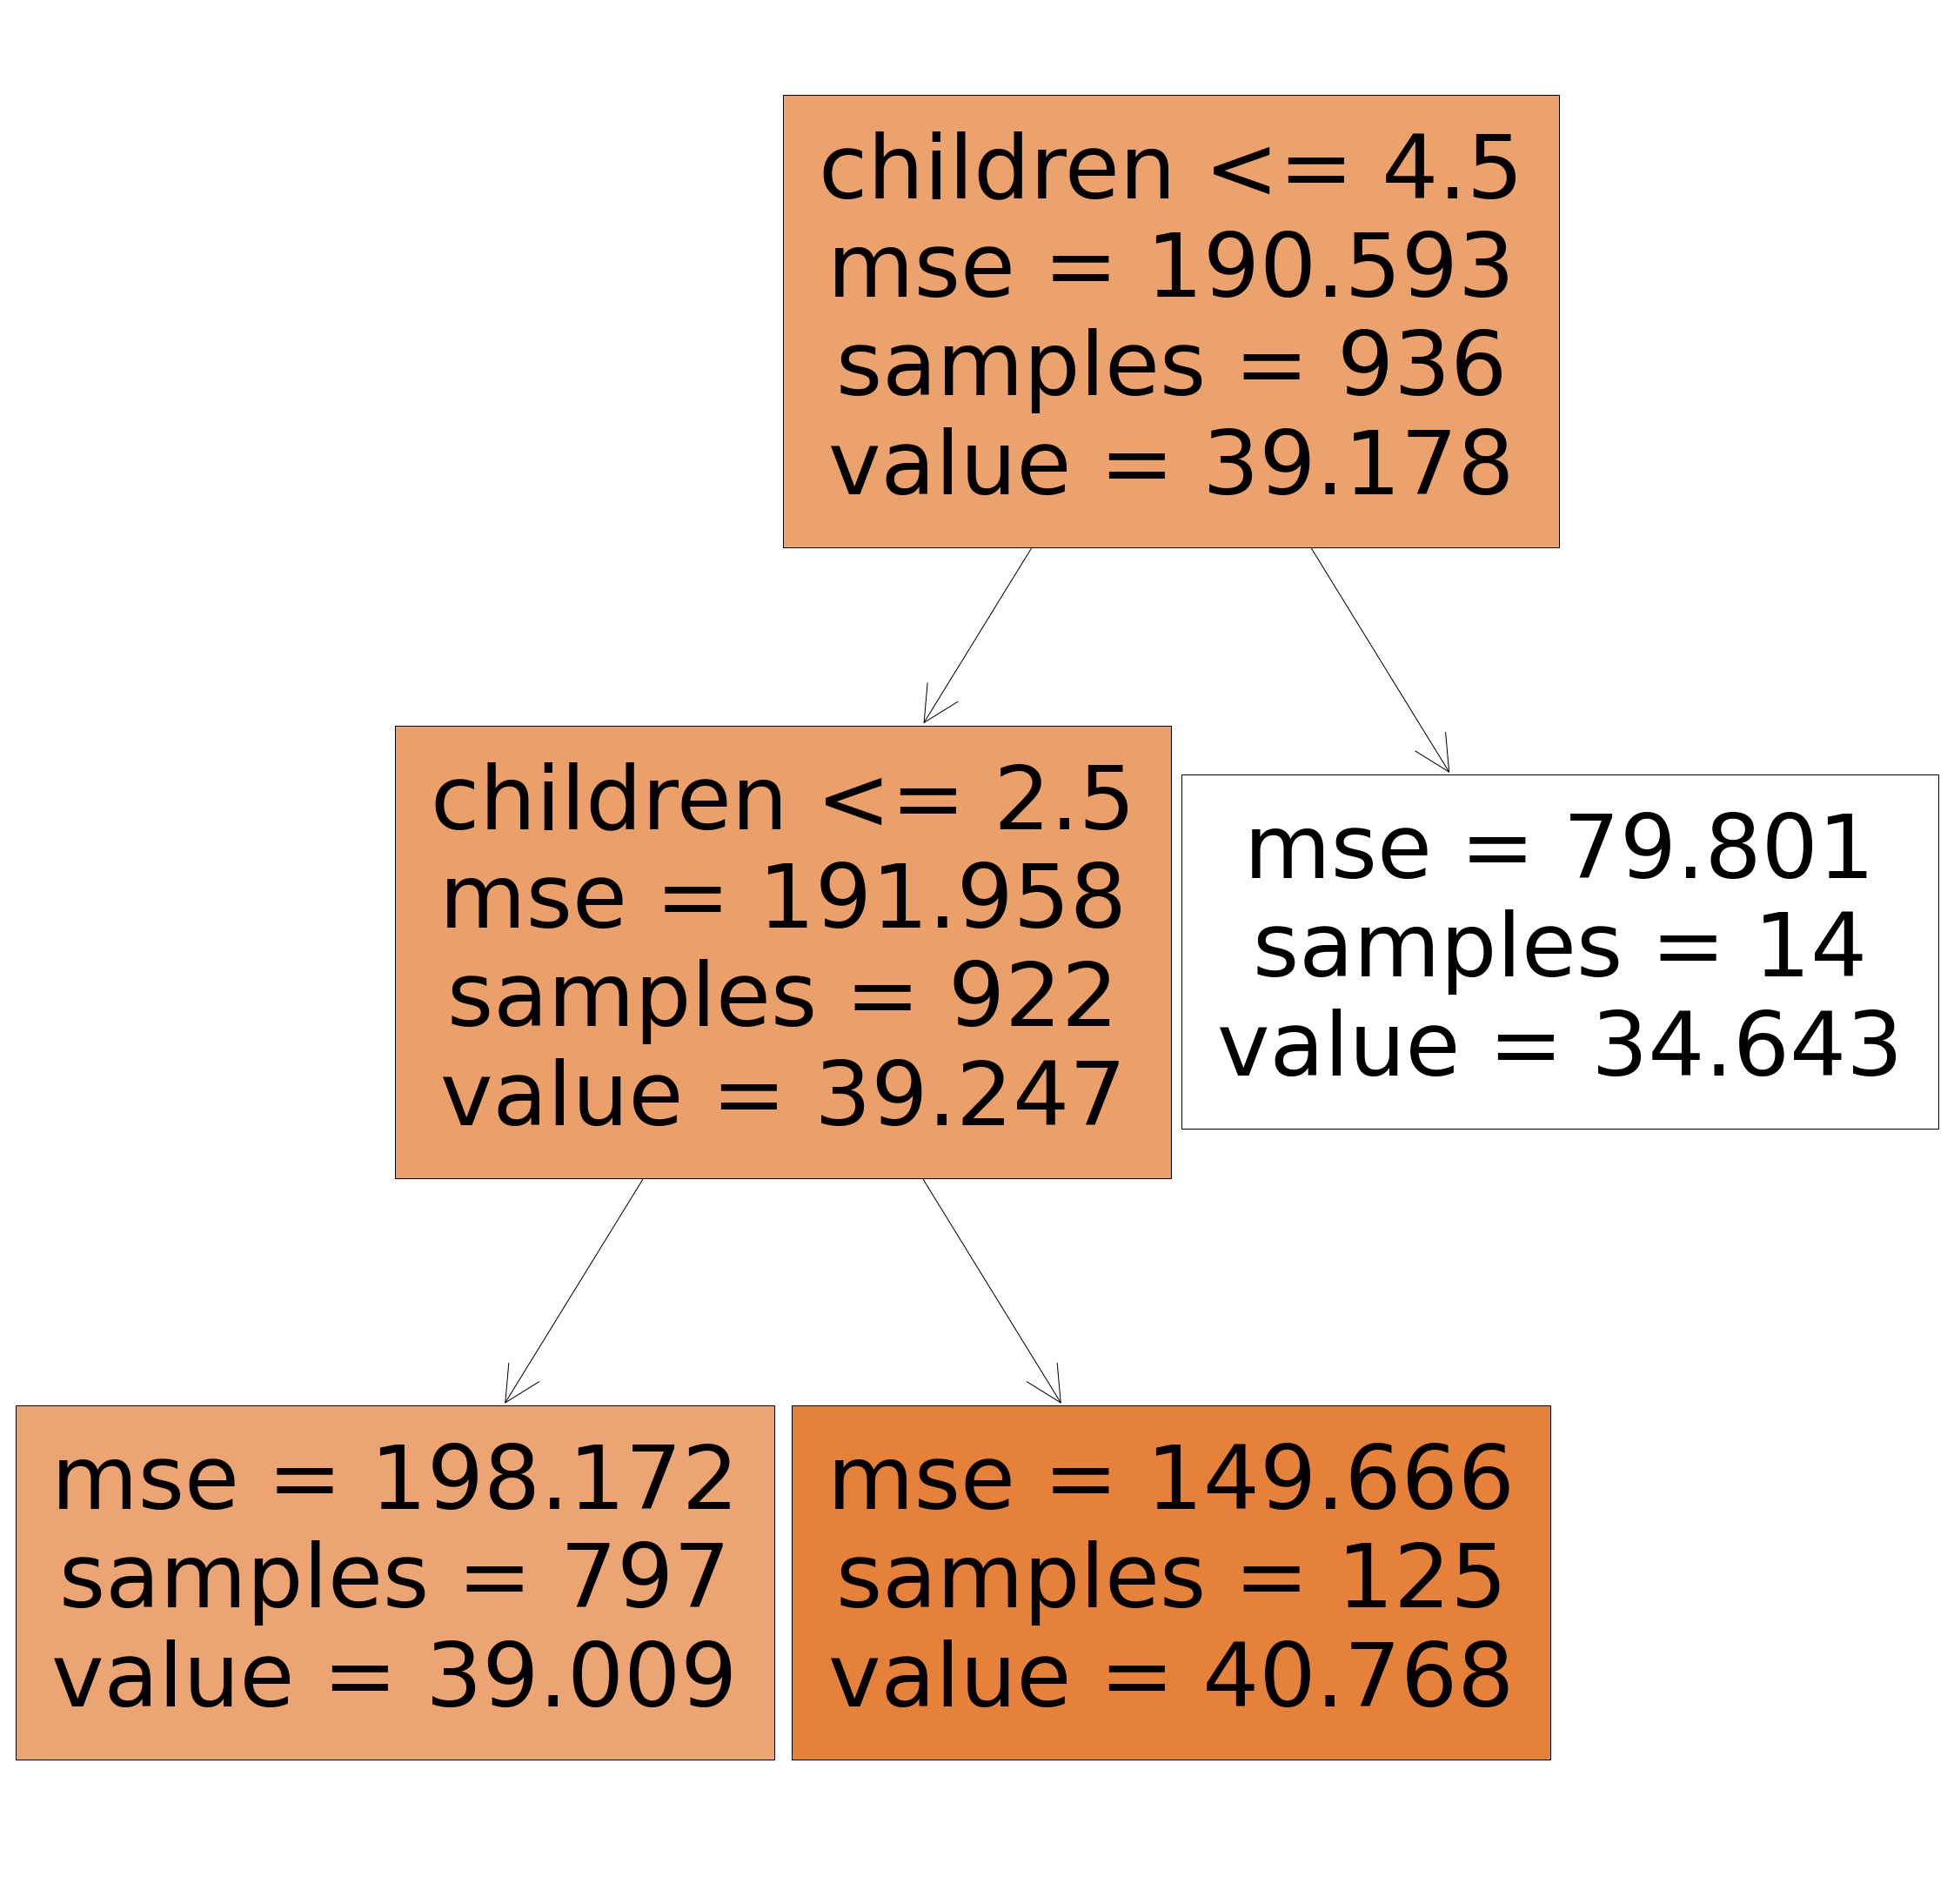

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

plot_tree_regression(dt_regression, features)